# Part II - (Prosper Loan Data Exploratory Analysis)
## by (Lovette O. Duke)

## Investigation Overview


> This presentation displays key correlations observed in the Exploratiory analysis.
I considered the current loan status which correlates with higher income range, home ownership and higher credit scores.

## Dataset Overview

> The Prosper Loan dataset downloaded from the Udacity "Communicate Data Findings Project" dataset options page contains 113,937 observations with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income etc.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
loan_df = pd.read_csv('prosperLoanData.csv')
loan_df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [3]:
loan_dfe = loan_df[['LoanStatus', 'LoanOriginalAmount', 'BorrowerRate', 'Occupation', 'EmploymentStatus', 
                   'EmploymentStatusDuration', 'IsBorrowerHomeowner', 'CurrentlyInGroup', 'IncomeRange', 
                   'CreditScoreRangeLower', 'CreditScoreRangeUpper']]
loan_dfc = loan_dfe.loc[(loan_dfe.EmploymentStatus != 'Not available') & (loan_dfe.IncomeRange != 'Not displayed')]
loan_dfc.head()

,LoanStatus,LoanOriginalAmount,BorrowerRate,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,IncomeRange,CreditScoreRangeLower,CreditScoreRangeUpper
0,Completed,9425,0.1580,Other,Self-employed,2.0,True,True,"$25,000-49,999",640.0,659.0
1,Current,10000,0.0920,Professional,Employed,44.0,False,False,"$50,000-74,999",680.0,699.0
3,Current,10000,0.0974,Skilled Labor,Employed,113.0,True,False,"$25,000-49,999",800.0,819.0
4,Current,15000,0.2085,Executive,Employed,44.0,True,False,"$100,000+",680.0,699.0
5,Current,15000,0.1314,Professional,Employed,82.0,True,False,"$100,000+",740.0,759.0


## (Visualization 1)

>The heat map displaces the correlation between Loan status and Income Range. This shows that higher income range correlates to to current loan status ie the higher the income range the higher the proportion of current loans. 



In [4]:
z = loan_dfc.loc[(loan_dfc.LoanStatus == 'Chargedoff') | (loan_dfc.LoanStatus == 'Completed') | (loan_dfc.LoanStatus == 'Current') | (loan_dfc.LoanStatus == 'Defaulted')]
loandf_counts = z.groupby(['LoanStatus','IncomeRange']).size()
loandf_counts = loandf_counts.reset_index(name ='counts')
loandf_counts = loandf_counts.pivot(index = 'IncomeRange', columns= 'LoanStatus', values='counts')

loandf_counts

LoanStatus,Chargedoff,Completed,Current,Defaulted
IncomeRange,,,,
$0,185,370,11,51
"$1-24,999",1329,2908,2536,334
"$100,000+",968,4774,10916,322
"$25,000-49,999",4162,10891,15111,1290
"$50,000-74,999",2633,9282,17615,874
"$75,000-99,999",1153,4914,10139,375
Not employed,182,325,248,25


In [5]:
prop = loandf_counts.copy()
prop['Totals'] = prop.sum(axis=1)

prop['Chargedoff'] = prop['Chargedoff']/prop['Totals']
prop['Completed'] = prop['Completed']/prop['Totals']
prop['Current'] = prop['Current']/prop['Totals']
prop['Defaulted'] = prop['Defaulted']/prop['Totals']
prop.drop('Totals', axis = 1, inplace=True)
prop

LoanStatus,Chargedoff,Completed,Current,Defaulted
IncomeRange,,,,
$0,0.299838,0.599676,0.017828,0.082658
"$1-24,999",0.186999,0.409174,0.356831,0.046996
"$100,000+",0.057008,0.281154,0.642874,0.018963
"$25,000-49,999",0.132320,0.346252,0.480416,0.041012
"$50,000-74,999",0.086600,0.305289,0.579365,0.028746
"$75,000-99,999",0.069537,0.296363,0.611483,0.022616
Not employed,0.233333,0.416667,0.317949,0.032051


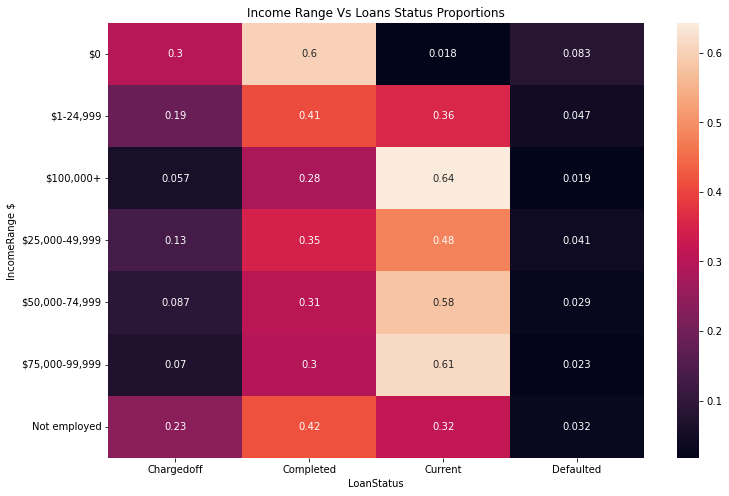

In [6]:
plt.figure(figsize=[12,8])
h = sb.heatmap(prop, annot=True)
h.set(title = 'Income Range Vs Loans Status Proportions', ylabel = 'IncomeRange $');

## (Visualization 2)

> The Scatter plot displaying the relationship between the Loan amount, Interest rate(BorrowerRate) and Home ownership shows a trend above 25,000 dollars where most borrowers are home owners and the interest rate is below 20%.


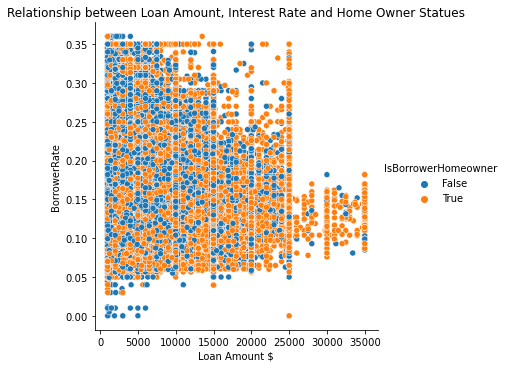

In [7]:
g = sb.relplot(x = 'LoanOriginalAmount', y = 'BorrowerRate', data = z, hue = 'IsBorrowerHomeowner')
g.set(title = 'Relationship between Loan Amount, Interest Rate and Home Owner Statues', xlabel='Loan Amount $');

## (Visualization 3)

> The Scatter plot displaying the relationship between Loan amount, Credit Score and Loan status also shows a trend in loans above 25,000 dollars as only credit scores above 740 access these higher loans.

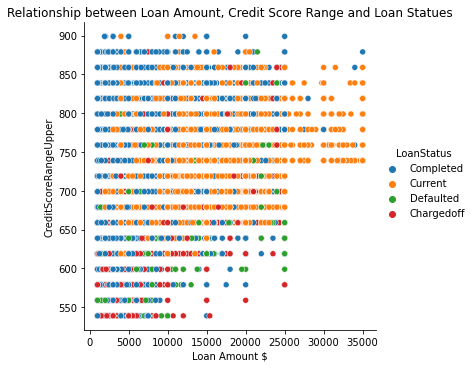

In [8]:
g = sb.relplot(x = 'LoanOriginalAmount', y = 'CreditScoreRangeUpper', data = z, hue = 'LoanStatus')
g.set(title = 'Relationship between Loan Amount, Credit Score Range and Loan Statues', xlabel='Loan Amount $');

In [ ]:
!jupyter nbconvert Part_II_Loan_data_slide_deck.ipynb --to slides --post serve --no-input --no-prompt